In [27]:
import numpy as np
import random
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from datetime import date

In [34]:
# Constants

NOT_VISITED = -1
UNBLOCKED = 0
BLOCKED = 1
START = 2
KNOWN_UNBLOCKED = 3
KNOWN_BLOCKED = 4
END = 5

COLORMAP = {
    NOT_VISITED : np.array([127,127,127]),
    UNBLOCKED : np.array([255,255,255]),
    BLOCKED : np.array([0,0,0]),
    START : np.array([255,0,0]),
    KNOWN_UNBLOCKED : np.array([248,131,121]),
    KNOWN_BLOCKED : np.array([0,255,0]),
    END : np.array([0,0,255])
}

TEST_WORLDS = 5
TEST_WORLD_SIZE = 20

OUTPUT_BASE_PATH = "Outputs/"
TODAY = date.today()

In [29]:
def calculateNeighbours(location, t_size):
    # We first calculate all 9 cells in the neighbourhood,
    # and then filter out itself and the ones in the cross
    # by filtering elements with manhattan distance not equal to one.
    return list(filter(lambda x: abs(location[0]-x[0])+abs(location[1]-x[1])==1, [(x,y) for x in range(location[0]-1 if location[0]-1 > -1 else 0, location[0]+2 if location[0]+1<t_size else t_size) for y in range(location[1]-1 if location[1]-1 > -1 else 0, location[1]+2 if location[1]+1<t_size else t_size)]))

In [30]:
def getRandomCoordinates(t_size):
    # Returns a tuple of coordinnates
    return (random.randint(0, t_size - 1), random.randint(0, t_size-1))

def getRandomCoordinatesInQuarter(t_size, quarter):
    # Returns a tuple of coordinnates
    t = t_size - 1
    x = (0,int(t/4)) if quarter[0]==0 else (int(3*t/4), t)
    y = (0,int(t/4)) if quarter[1]==0 else (int(3*t/4), t)
    return (random.randint(x[0], x[1]), random.randint(y[0], y[1]))

In [31]:
def generateGrid(t_size):
    # Initially all cells are set as not visited
    # 1 marks blocked, 0 marks unblocked, -1 for not visited
    grid = np.full(shape = (t_size, t_size), fill_value = NOT_VISITED, dtype = np.int8)

    # A random location on the grid to begin with, and mark it visited
    begin = getRandomCoordinates(t_size)
    grid[begin[0], begin[1]] = BLOCKED

    # Using a stack as a frontier, so we can use DFS to generate the blocked paths
    frontier = []
    frontier.append(begin)
    while(len(frontier) > 0):
        current = frontier.pop()
        # Calculating the current's neighbours
        neighbours = calculateNeighbours(current, t_size)
        for nx,ny in neighbours:
            if grid[nx,ny] == NOT_VISITED:
                # If the location is not visited, add it to the frontier
                frontier.append((nx,ny))
                # Mark it blocked or unblocked randomly
                grid[nx,ny] = BLOCKED if random.random() > 0.7 else UNBLOCKED
    return grid

In [32]:
def showGrid(grid, name):
    # Fancypants util that makes use of predefined colours
    # for each data value in the grid and makes it easier to visualise
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X = [[COLORMAP[e] for e in row] for row in grid])
    plt.savefig(OUTPUT_BASE_PATH + TODAY.strftime("%d-%m-%Y") + "-" + name + ".png", bbox_inches="tight")

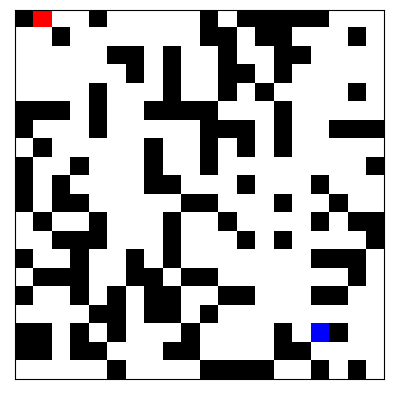

In [35]:
grid = generateGrid(TEST_WORLD_SIZE)
start = getRandomCoordinatesInQuarter(TEST_WORLD_SIZE, (0,0))
reach = getRandomCoordinatesInQuarter(TEST_WORLD_SIZE, (1,1))
grid[start] = START
grid[reach] = END

showGrid(grid, "base_environment")